In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
%matplotlib inline
from __future__ import division

## Matriz de Overlap

In [52]:
# Elemento de matriz de overlap
def Overlap_ij(alpha,i,j):
    Sij = ( np.pi / (alpha[i] + alpha[j]) )**(1.5)
    return Sij

# Matriz de overlap
def Matriz_Overlap(alpha):
    nsize = len(alpha)
    S = np.zeros((nsize,nsize))
    for i in range(0,nsize):
        for j in range(i,nsize):        
            S[i,j]=Overlap_ij(alpha,i,j)
            S[j,i]=S[i,j]
    return S

## Matriz del Hamiltoniano

In [53]:
# Elemento de matriz de cinetica
def Tij(alpha,l,i,j):
    rnum = 3 * np.pi**(1.5) * alpha[i] * alpha[j]
    rden = (alpha[i] + alpha[j])**(2.5)    
    Tij = rnum/rden + l*(l+1)*np.pi**(3/2)/(alpha[i]+alpha[j])**0.5
    return Tij

 
# Elemento de matriz de potencial
def Vij(alpha,Z,i,j):
    Vij =  Z*( -2*np.pi )  /  (alpha[i] + alpha[j])    
    return Vij

# Matriz del Hamiltoniano en la base elegida (gaussianos en este caso)
def Matriz_H(alpha,l,Z):
    nsize = len(alpha)
    H = np.zeros((nsize,nsize))
    for i in range(nsize):
        for j in range(i,nsize): 
            H[i,j] = Tij(alpha,l,i,j) + Vij(alpha,Z,i,j)
            H[j,i] = H[i,j]
    return H

## Tensor Q (integrales de 4 gaussianas con diferentes exponentes)

In [54]:
# Elemento de matriz del tensor Q, donde p,r,q,s son las combinaciones de los alphas
def Qprqs(alpha,p,r,q,s):
    num = 2*np.pi**2.5 
    den = (alpha[p]+alpha[q])*(alpha[r]+alpha[s])*(alpha[p]+alpha[q]+alpha[r]+alpha[s])**0.5
    return num/den

# Tensor Q
def Tensor_Q(alpha):
    Iter = range(len(alpha))
    Q = np.array([[[[Qprqs(alpha,p,r,q,s) for p in Iter] for r in Iter] for q in Iter] for s in Iter])
    return Q

## Matriz del operador de Fock

In [55]:
# Construccion del operador de Fock en forma matricial
def F_Matriz(H,Q,Ci):
    size = H.shape[0]
    F = np.zeros(H.shape)
    for i in range(size):
        for j in range(i,size):
            F[i,j] = H[i,j] + Ci.dot(Q[i,:,j,:].dot(Ci))
            F[j,i] = F[i,j]
    return F

## Normalizacion de los coeficientes (via matriz de overlap)

In [56]:
def C_Norm(C,S):
    size = C.shape[0]
    for i in range(size):
        Ci = C[:,i]
        norm = Ci.T.dot(S.dot(Ci))**0.5
        C[:,i] = C[:,i]/norm

## Calculo de la energia de Hartree-Fock

In [57]:
def Energy_Calc(Ci,H,Q):
    Iter = range(Ci.shape[0])
    cumres = 2*Ci.T.dot(H.dot(Ci))
    for p in Iter:
        for r in Iter:
            for q in Iter:
                for s in Iter:
                    cumres = cumres + Ci[p]*Ci[r]*Ci[q]*Ci[s]*Q[p,r,q,s]
    return cumres

## Calculo de la funcion de onda de HF a partir de los coeficientes

In [58]:
def psi(Ci,Alpha,x):
    nsize = len(Ci) 
    res = 0
    for i in range(0,nsize):
        res = res + Ci[i]*np.exp(-Alpha[i]*x**2)
    return res

# Helio $1s^2$

In [59]:
# H
#alpha = np.array([0.1219492,0.444529,1.962079,13.00773])

# H- 
#alpha = 0.15*np.array([0.298073,1.242567,5.782948,38.474970])

# He
#1s2
alpha = np.array([0.298073,1.242567,5.782948,38.474970])
#2s2
#alpha = np.array([0.006,0.05, 0.1, 0.298073,1.242567,5.782948,38.474970])

# Li+
#alpha = 3*np.array([0.298073,1.242567,5.782948,38.474970])


Z = 2
l = 0

S = Matriz_Overlap(alpha)
C_new = np.random.rand(len(alpha),len(alpha)) #np.ones((len(alpha),len(alpha)))
C_Norm(C_new,S)

H = Matriz_H(alpha,l,Z)
Q = Tensor_Q(alpha)

cont = 0

In [106]:
C = C_new
F = F_Matriz(H,Q,C[:,0])
E, C_new = eigh(F,S,type=1)
C_Norm(C_new,S)
print "Iteracion Nro:", cont
print "-) Energia Total:", Energy_Calc(C_new[:,0],H,Q)
print "-) Energia Ionizacion:", E[0]
cont += 1

Iteracion Nro: 32
-) Energia Total: -2.8551603823702574
-) Energia Ionizacion: -0.9141235006126321


In [107]:
r,psiFunc = np.loadtxt("He_wave.1s",unpack=True)
rmin, rmax = 0, 22
r = r[np.where(r<=rmax)]
psi_johnson = psiFunc[:len(r)]
psi_calc = np.zeros(len(r))
psi_calc = psi(C_new[:,0],alpha,r)

# Normalizo ambas funciones en el intervalo deseado
psi_johnson = psi_johnson/np.trapz((psi_johnson)**2)**0.5
psi_calc = r*psi_calc/np.trapz((r*psi_calc)**2)**0.5

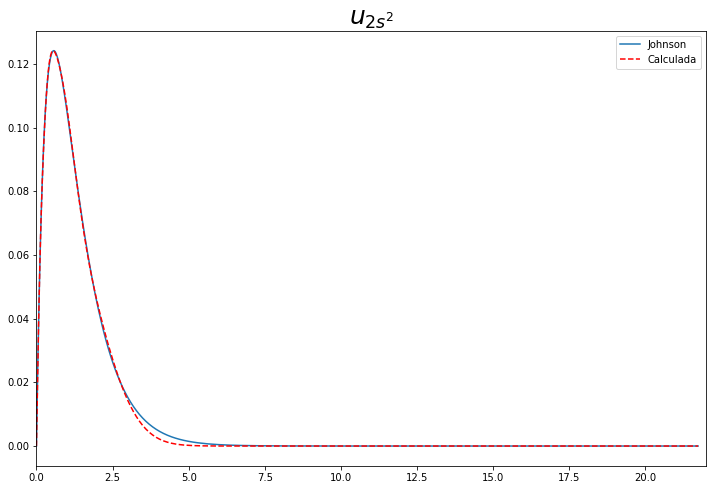

In [108]:
plt.figure(figsize=(12,8))
plt.plot(r,psi_johnson, label = "Johnson")
plt.plot(r,psi_calc ,'r--', label = "Calculada")
plt.xlim(rmin,rmax)
plt.title("$u_{2s^2}$", size=25)
plt.legend(loc='best')

# Hartree-Fock

In [160]:
def Overlap_ij(alpha,i,j):
    Sij = ( np.pi / (alpha[i] + alpha[j]) )**(1.5)
    return Sij

def Matriz_Overlap(alpha):
    nsize = len(alpha)
    S = np.zeros((nsize,nsize))
    for i in range(0,nsize):
        for j in range(i,nsize):        
            S[i,j]=Overlap_ij(alpha,i,j)
            S[j,i]=S[i,j]
    return S

In [161]:
# Elemento de matriz de cinetica
def Tij(alpha,l,i,j):
    rnum = 3 * np.pi**(1.5) * alpha[i] * alpha[j]
    rden = (alpha[i] + alpha[j])**(2.5)    
    Tij = rnum/rden + l*(l+1)*np.pi**(3/2)/(alpha[i]+alpha[j])**0.5
    return Tij

 
# Elemento de matriz de potencial
def Vij(alpha,Z,i,j):
    Vij =  Z*( -2*np.pi )  /  (alpha[i] + alpha[j])    
    return Vij

# Matriz del Hamiltoniano en la base
def H_Matriz(alpha,l,Z):
    nsize = len(alpha)
    H = np.zeros((nsize,nsize))
    for i in range(nsize):
        for j in range(i,nsize): 
            H[i,j] = Tij(alpha,l,i,j) + Vij(alpha,Z,i,j)
            H[j,i] = H[i,j]
    return H

def Qprqs(alpha,p,r,q,s):
    num = 2*np.pi**2.5 
    den = (alpha[p]+alpha[q])*(alpha[r]+alpha[s])*(alpha[p]+alpha[q]+alpha[r]+alpha[s])**0.5
    return num/den

def P_Matriz(C):
    return 2*C.dot(C.T)

def Q_Tensor(alpha):
    Iter = range(len(alpha))
    Q = np.array([[[[Qprqs(alpha,p,r,q,s) for p in Iter] for r in Iter] for q in Iter] for s in Iter])
    return Q

def Gij(P,Q,i,j):
    Gij = 0
    size = P.shape[0]
    for r in range(size):
        for s in range(size):
            Gij = Gij + P[r,s]*(Q[i,r,j,s] - 0.5*Q[i,r,s,j])
    return Gij

def G_Matriz(P,Q):
    G = np.zeros(P.shape)
    for i in range(G.shape[0]):
        for j in range(G.shape[0]):
            #G[i,j] = Gij(P,Q,i,j)
            G[i,j] = 1/2*np.trace(P.dot(2*Q[i,:,j,:] - Q[i,:,:,j]))
    return G

def F_Matriz(H,G):
    return H + G

def C_Norm(C,S):
    size = C.shape[0]
    for i in range(size):
        Ci = C[:,i]
        norm = Ci.T.dot(S.dot(Ci))**0.5
        C[:,i] = C[:,i]/norm

def Energy_Calc(E,H,P):
    #return 1/2*(np.sum(E) + np.trace(H.dot(P)))
    e = np.trace(P.dot(H))
    Iter = range(len(E))
    for p in Iter:
        for q in Iter:
            for r in Iter:
                for s in Iter:
                    e = e + 0.5*P[p,q]*P[r,s]*(Q[p,r,q,s]-0.5*Q[p,r,s,q])
    return e
    

In [162]:
# H
#alpha = np.array([0.1219492,0.444529,1.962079,13.00773])

# H- 
#alpha = 0.15*np.array([0.298073,1.242567,5.782948,38.474970])

# He
alpha = np.array([0.298073,1.242567,5.782948,38.474970])

# Li+
#alpha = 3*np.array([0.298073,1.242567,5.782948,38.474970])


Z = 2
l = 0

S = Matriz_Overlap(alpha)
C_new = np.ones((len(alpha),len(alpha))) # np.random.rand(4,4)
C_Norm(C_new,S)

H = H_Matriz(alpha,l,Z)
Q = Q_Tensor(alpha)

cont = 0

In [173]:
C = C_new
P = P_Matriz(C)
# Armo el operador de Fock
F = F_Matriz(H,G_Matriz(P,Q))
#print F
E, C_new = eigh(F,S,type=1)
C_Norm(C_new,S)
print "Iteracion Nro:", cont
print "-) Energia Total:", Energy_Calc(E,H,P)
print "-) Energia Ionizacion:", E
cont += 1

Iteracion Nro: 10
-) Energia Total: 166.90761867510184
-) Energia Ionizacion: [ 3.38805009  7.22448945 17.51472412 75.12632819]
